# Buidling models of the data

1. Supervised learning
 1) Classification
 2) Regression
2. Unsupervised learning
 3) Clustering
 4) Dimensionality reduction

In [1]:
#data
import seaborn as sns
iris  = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\woshi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\woshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


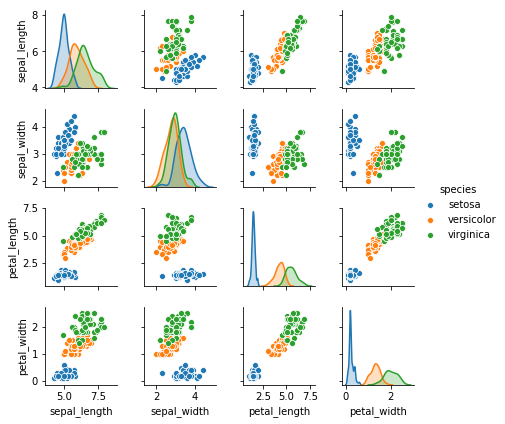

In [7]:
sns.pairplot(iris,hue='species',size=1.5);

In [14]:
#to use skit-learn need to extract features and target array
import pandas as pd
X_iris = iris.drop('species',axis=1)
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Basics of API

In [ ]:
#1. Choose a class of model
#2. Choose model hyperparameters
#3. arrage data into a features matrix and target vector
#4. fit the model
#5. Apply the model to new data-predict of trandform

In [1]:
import seaborn as sns
import pandas as pd

# 1. simple linear regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rng = np.random.RandomState(42) #same as R set.seed
x = 10 * rng.rand(50) #uniform dist
y = 2 * x -1 +rng.randn(50) #normal error

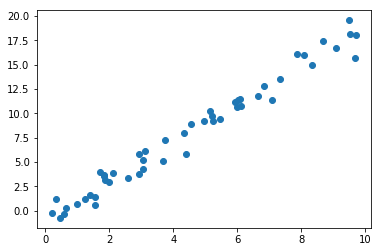

In [4]:
plt.scatter(x,y);

In [6]:
#1. choose model
from sklearn.linear_model import LinearRegression
#2. Hyperparameters
model = LinearRegression(fit_intercept=True) #instantiate model

In [7]:
#3. arrage data
X = x[:,np.newaxis] #feature matrix
Y = y #target array
print(X.shape)
print(y.shape)

(50, 1)
(50,)


In [8]:
# 4. fit model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
model.coef_

array([1.9776566])

In [10]:
model.intercept_

-0.9033107255311164

In [15]:
# 5. predict
xfit = np.linspace(-1,11) #new data
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

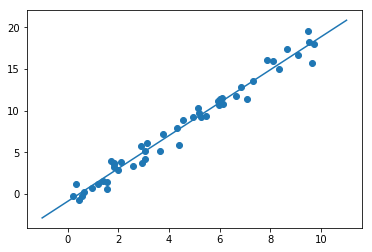

In [16]:
#6. visualize results
plt.scatter(x,y)
plt.plot(xfit,yfit);

## Adapt linear regression

In [3]:
#1. Polynomial
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [23]:
#use a pipeline to make a 7th-degree polynomial model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

In [24]:
#data
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = np.sin(x)+0.1 *rng.randn(50)

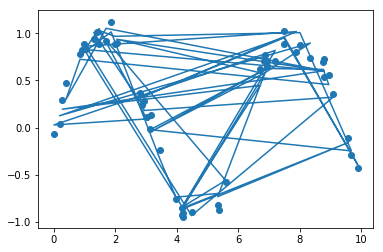

In [27]:
#fit model
poly_model.fit(x[:,np.newaxis],y)

#predict
yfit = poly_model.predict(x[:,np.newaxis])

plt.scatter(x, y)
plt.plot(x, yfit);

In [31]:
#2. Regularization

#L2 regularization: Ridge regression
from sklearn.linear_model import Ridge
model = make_pipeline(Ridge(alpha=0.1))

In [34]:
#L1 regularization : Lasso regression
from sklearn.linear_model import Lasso
model = make_pipeline(Lasso(alpha=0.001))

# 2.1 Naive Bayes Classification

In [4]:
# split trainning set and testing set
from sklearn.cross_validation import train_test_split
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species',axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [5]:
#model fit and predict
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [6]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

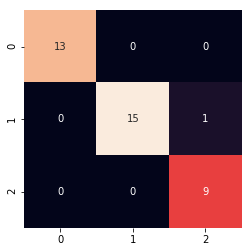

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False);

In [ ]:
# Naive Bayes models: extremely fast, simple, suitable for very high-dimentional datasets
# quick-and-dirty baseline

In [19]:
#nultinomial naive bayes: used in text classification
from sklearn.datasets import fetch_20newsgroups

In [20]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [21]:
#select just a few of them
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']

In [23]:
train = fetch_20newsgroups(subset="train",categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [25]:
#convert the content of each string into a vector of numbers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [28]:
model.fit(train.data,train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [34]:
lables = model.predict(test.data)

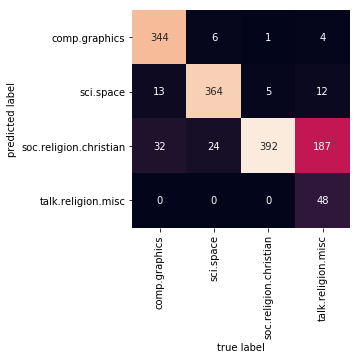

In [36]:
#evaluate results 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,lables)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels = train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 3. Unsupervised learning example: Iris dimensionality

In [9]:
#dimention reduction is often used to visualize data: high dimention to 2 dimentions
#PCA
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

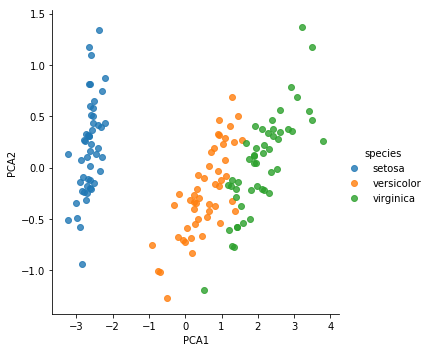

In [11]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species',data=iris,fit_reg=False);

In [27]:
# PCA can be used for visualization, noise filtering, feature extraction and engineering and much more
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [3]:
rng=np.random.RandomState(42)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(pca.components_)

[[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]


In [7]:
print(pca.explained_variance_)

[1.82927343 0.10246373]


In [8]:
#components define the direction of the vector
#explained vriance to define the squred-length of the vector

In [9]:
#example of hand-written digits

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [19]:
pca = PCA(n_components=2)

In [29]:
projected = pca.fit_transform(digits.data)

In [22]:
print(projected.shape)

(1797, 2)


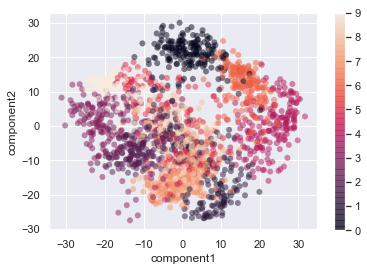

In [32]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.colorbar()
plt.xlabel('component1')
plt.ylabel('component2');

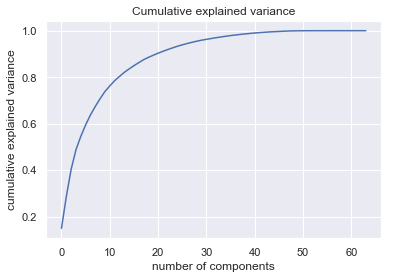

In [37]:
#choosing the number of components
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.title("Cumulative explained variance");

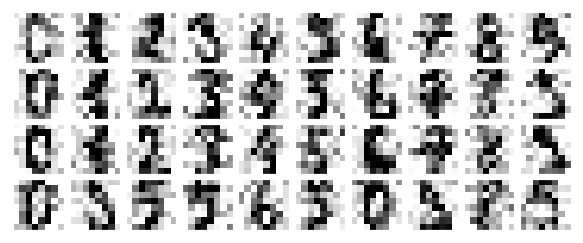

In [40]:
#PCA as noise filtering
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

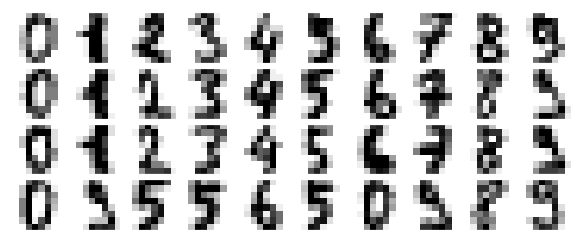

In [39]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [43]:
pca=PCA(0.50).fit(noisy) #50% of the cariance
pca.n_components_

12

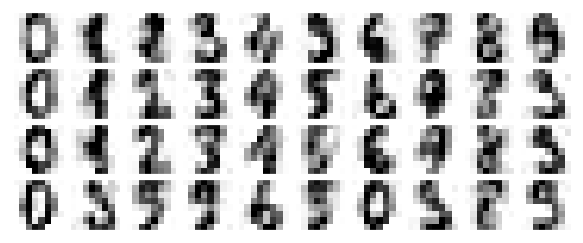

In [46]:
components = pca.transform(noisy)
filtered  = pca.inverse_transform(components)
plot_digits(filtered);

# 3. Unsupervised learning: Clustering

In [13]:
#Gaussian mixure models (GMM)
from sklearn.mixture import GMM
model = GMM(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris);

C:\Users\woshi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\woshi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\woshi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\woshi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

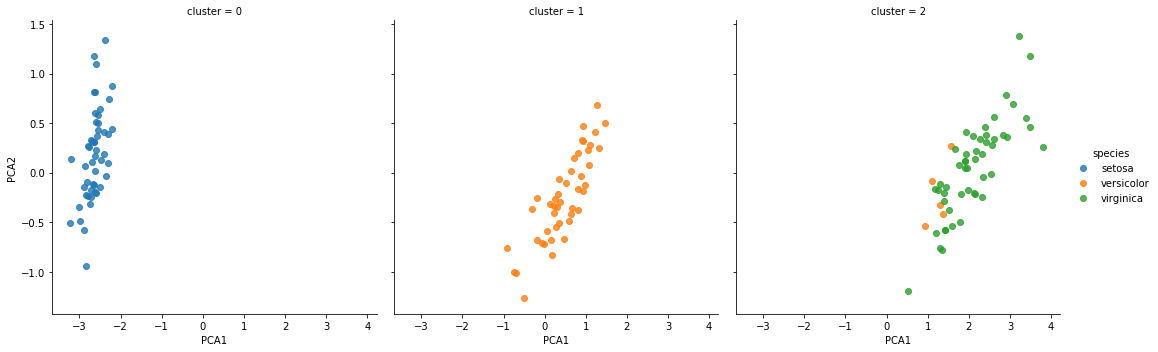

In [15]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1','PCA2',data=iris,hue='species',col='cluster',fit_reg=False);